## Step 1: Install Required Libraries & Start JupyterLab

Before beginning the analysis, I installed all necessary Python libraries listed in the `requirements.txt` file into my `20th_century` virtual environment. These libraries include:

- `nltk`: For natural language processing tasks such as tokenization and POS tagging.
- `pandas`: For data manipulation and dataframe creation.
- `matplotlib` and `seaborn`: For creating visualizations.
- `textblob`: For sentiment analysis.
- `string` and `collections`: For text cleaning and word frequency analysis.

Once the libraries were installed, I launched JupyterLab using the required data rate argument to ensure compatibility:

```bash
jupyter lab --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddildar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammaddildar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Set Up Notebook & Load Twentieth-Century Text Data

In this step, I started a new Jupyter notebook using the `20th_century` virtual environment. I then imported all the necessary Python libraries for text processing and visualization, including:

- `nltk` – for tokenization and POS tagging  
- `pandas` – for organizing and analyzing data  
- `matplotlib.pyplot` & `seaborn` – for plotting graphs  
- `collections.Counter` – for counting word frequencies  
- `string` – for punctuation handling

After importing the libraries, I loaded the cleaned twentieth-century text data that I previously scraped in Exercise 1.4 from the file:

📄 `20th_century_scrape.txt`

This file contains a detailed summary of major events throughout the 20th century and will be used for all text mining tasks in this exercise.


In [3]:
# Load the 20th century text file
with open('/Users/muhammaddildar/Desktop/20th_century_scraping/20th_century_scrape.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Quick preview
print(text[:1000])


The 20th century changed the world in unprecedented ways.
The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.
These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.
The new beginning of the 20th century marked significant changes.
The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.
1914 saw the completion of the Panama Canal.
The Scramble for Africa continued in the 1900s and resulted in wars and genocide across the continent.
The atrocities in the Congo Free State shocked the civilized world.
From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.
The First World War (or simply WWI), termed "T

## Step 3: Tokenize Words & Visualize the 10 Most Common Words

Using the `nltk` library, I tokenized the full twentieth-century text into individual words. Tokenization breaks the text into smaller components (tokens) — in this case, words — which allows us to analyze frequency and patterns more easily.

After tokenization, I used `collections.Counter` to count how often each word appeared in the text. I then visualized the **top 10 most common words** using a bar chart with `s


In [10]:
# Download tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddildar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Tokenize words
words = nltk.word_tokenize(text)

In [12]:
# Count words
word_freq = Counter(words)

In [13]:
# Get 10 most common words
common_words = word_freq.most_common(10)

In [14]:
# Convert to DataFrame
import pandas as pd
df_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

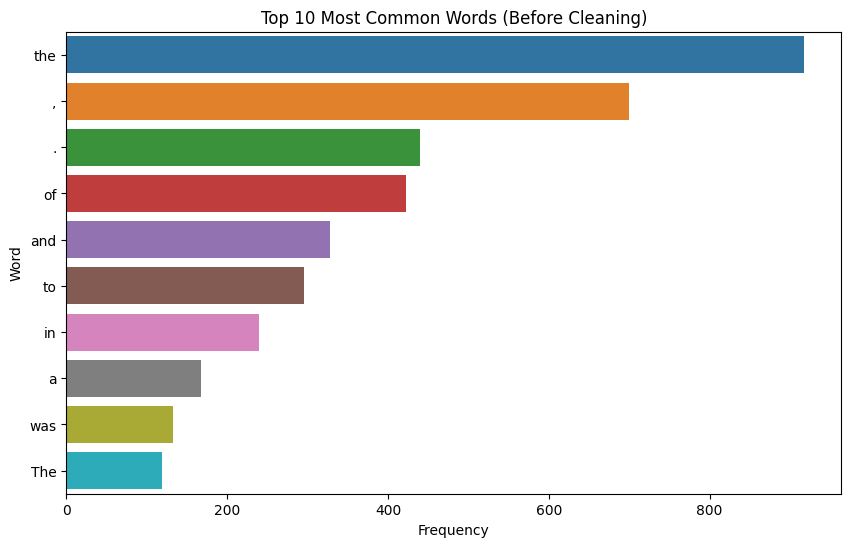

In [9]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_common, x='Frequency', y='Word')
plt.title('Top 10 Most Common Words (Before Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [15]:
import string
from nltk.corpus import stopwords

## Step 4: Remove Stopwords and Punctuation, and Rerun the Plot

To improve the quality of the analysis, I removed common **stopwords** (like “the”, “is”, “and”) using NLTK’s built-in list. I also filtered out **punctuation** and non-alphabetic characters to clean the tokenized data.

After cleaning, I recalculated the word frequencies and created a new bar chart of the **top 10 most common words**.


In [16]:
# Download stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammaddildar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Create stopwords list
stop_words = set(stopwords.words('english'))


In [18]:
# Remove punctuation and stopwords
words_cleaned = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]

In [19]:
# Count cleaned words
word_freq_clean = Counter(words_cleaned)

In [20]:
# Get top 10 cleaned common words
common_words_clean = word_freq_clean.most_common(10)


In [21]:
# Convert to DataFrame
df_common_clean = pd.DataFrame(common_words_clean, columns=['Word', 'Frequency'])


In [23]:
print(words_cleaned[:50])  # Show first 50 cleaned words

['20th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'world', 'wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'cold', 'war', 'led', 'space', 'race', 'creation', 'space-based', 'rockets', 'world', 'wide', 'web', 'created', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', '21st', 'century', 'today', 'new', 'beginning', '20th', 'century', 'marked', 'significant', 'changes', '1900s', 'saw', 'decade', 'herald', 'series', 'inventions']


In [24]:
print(common_words_clean)

[('war', 108), ('world', 56), ('soviet', 46), ("'s", 45), ('hitler', 40), ('first', 35), ('would', 34), ("''", 33), ('new', 31), ('``', 31)]


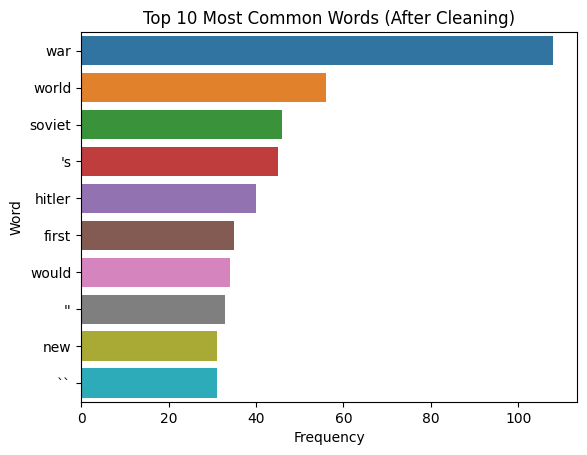

In [25]:
sns.barplot(data=df_common_clean, x='Frequency', y='Word')
plt.title('Top 10 Most Common Words (After Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [26]:
# Remove junk characters
words_cleaned = [word for word in words_cleaned if word.isalpha()]


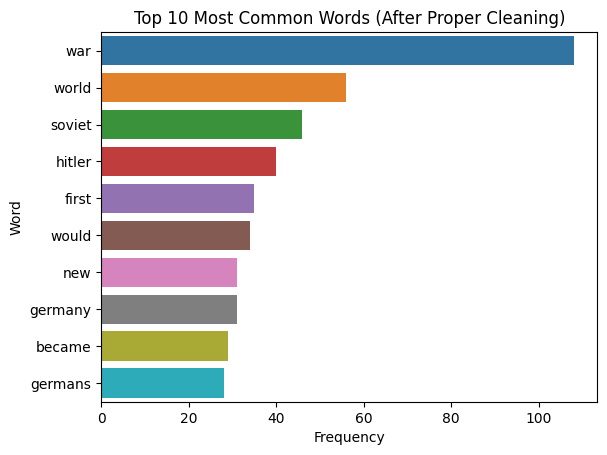

In [27]:
# Count cleaned words
word_freq_clean = Counter(words_cleaned)
common_words_clean = word_freq_clean.most_common(10)

# Convert to dataframe
df_common_clean = pd.DataFrame(common_words_clean, columns=['Word', 'Frequency'])

# Plot again
sns.barplot(data=df_common_clean, x='Frequency', y='Word')
plt.title('Top 10 Most Common Words (After Proper Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### 💡 Observations:
- The chart now highlights **content-heavy words** such as “war”, “world”, “soviet”, and “germany”.
- **Stopwords and punctuation**, which don’t provide meaningful insight, have been successfully removed.
- The new chart provides a much **clearer reflection of historical themes** and key subjects in the text.

This cleaning step ensures the analysis focuses on **informative and relevant** words from the article.

## Step 5: Create Part-of-Speech (POS) Tags Using TextBlob

To gain deeper insights into the structure of the text, I used the **TextBlob** library to tag each word with its corresponding part of speech (POS), such as nouns, verbs, adjectives, etc.

This helps in understanding how words function in context and sets the foundation for more advanced analysis like filtering specific types of words (e.g., only nouns or adjectives) or performing syntactic analysis.

The resulting list contains tuples of the form:  
**(word, POS tag)** — for example: `('war', 'NN')`, where `'NN'` represents a noun.


In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/muhammaddildar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
# Tag parts of speech
pos_tags = nltk.pos_tag(words_cleaned)

In [31]:
# Quick preview
print(pos_tags[:20])

[('century', 'NN'), ('changed', 'VBD'), ('world', 'NN'), ('unprecedented', 'JJ'), ('ways', 'NNS'), ('world', 'NN'), ('wars', 'NNS'), ('sparked', 'VBD'), ('tension', 'NN'), ('countries', 'NNS'), ('led', 'VBD'), ('creation', 'NN'), ('atomic', 'JJ'), ('bombs', 'NNS'), ('cold', 'JJ'), ('war', 'NN'), ('led', 'VBD'), ('space', 'NN'), ('race', 'NN'), ('creation', 'NN')]


In [32]:
from collections import Counter

In [33]:
# Count POS tags
pos_counts = Counter(tag for word, tag in pos_tags)


## Step 6: Identify the Top 10 Part-of-Speech (POS) Tags

After tagging each word with its corresponding part of speech, I analyzed the frequency of each POS tag used throughout the article.

This step helps highlight the grammatical structure of the text — for example, how often nouns, verbs, adjectives, and other types of words appear. It provides useful context for understanding the style and focus of the writing.

Below is a list of the **Top 10 most frequent POS tags** found in the article, based on the tagged words.


In [34]:
# Get top 10 most common POS tags
top_pos = pos_counts.most_common(10)

In [35]:
# Convert to DataFrame
df_pos = pd.DataFrame(top_pos, columns=['POS Tag', 'Frequency'])

In [36]:
# 👀 Quick preview
print(top_pos)

[('NN', 1939), ('JJ', 1310), ('NNS', 742), ('VBD', 453), ('RB', 354), ('VBG', 222), ('VBP', 202), ('VBN', 202), ('IN', 114), ('VB', 74)]


## Step 7: Plot Top 10 POS Tags Using Seaborn

To visualize the grammatical structure of the article, I created a bar chart showing the **Top 10 most frequent Part-of-Speech (POS) tags**.

This bar chart helps reveal which types of words dominate the text — for instance, a high count of **NN (nouns)** might suggest the article is fact-heavy, while **JJ (adjectives)** could indicate descriptive or emotional writing.

The chart below was created using the Seaborn library, which is useful for making attractive and informative statistical graphics in Python.


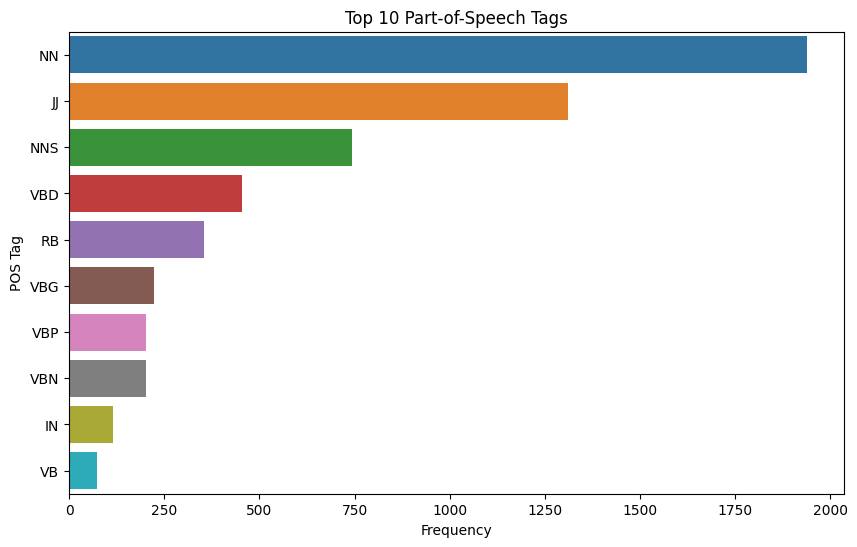

In [37]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_pos, x='Frequency', y='POS Tag')
plt.title('Top 10 Part-of-Speech Tags')
plt.xlabel('Frequency')
plt.ylabel('POS Tag')
plt.show()

## Step 8: Create Three Bar Plots for Nouns, Verbs, and Adjectives

To gain deeper insight into the grammatical structure of the text, I created **three separate bar charts** showing the **top 15 most frequent**:

- **Nouns** (NN, NNS, etc.)
- **Verbs** (VB, VBD, VBG, etc.)
- **Adjectives** (JJ, JJR, JJS)

This breakdown allows us to understand not just what words are most common, but **how language is being used** to construct meaning, describe events, and communicate emotion.

Each chart provides a focused look at the role different types of words play in the narrative structure of the twentieth-century historical content.


In [45]:
from collections import Counter

# Create separate lists for each POS category
nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]

# Count top 15
top_nouns = Counter(nouns).most_common(15)
top_verbs = Counter(verbs).most_common(15)
top_adjectives = Counter(adjectives).most_common(15)


In [41]:
import pandas as pd

df_nouns = pd.DataFrame(top_nouns, columns=['Word', 'Frequency'])
df_verbs = pd.DataFrame(top_verbs, columns=['Word', 'Frequency'])
df_adjectives = pd.DataFrame(top_adjectives, columns=['Word', 'Frequency'])

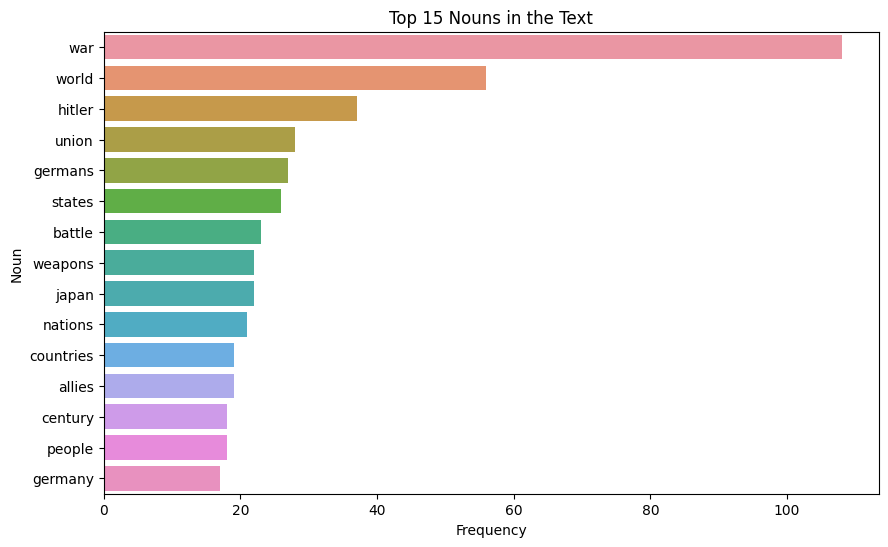

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df_nouns, x='Frequency', y='Word')
plt.title('Top 15 Nouns in the Text')
plt.xlabel('Frequency')
plt.ylabel('Noun')
plt.show()


### 🔍 Observation: Top 15 Nouns

The noun frequency chart shows that terms like **"war"**, **"world"**, and **"soviet"** are among the most common nouns in the text. This makes sense given the twentieth-century context, which involved global conflicts and geopolitical shifts. The presence of nouns like **"germany"**, **"hitler"**, and **"bombs"** also suggests a strong historical focus on WWII events. These nouns help anchor the narrative in real historical developments and entities.


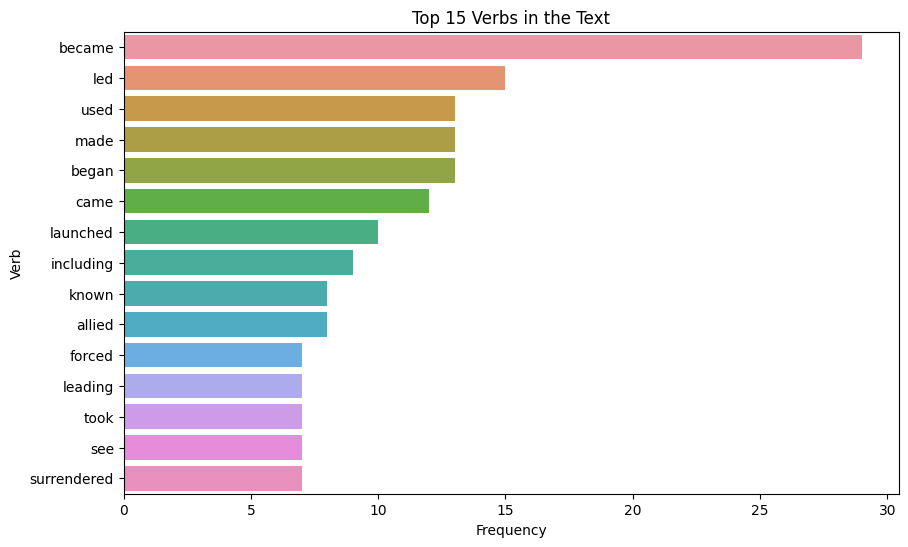

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_verbs, x='Frequency', y='Word')
plt.title('Top 15 Verbs in the Text')
plt.xlabel('Frequency')
plt.ylabel('Verb')
plt.show()


### 🔍 Observation: Top 15 Verbs

The verb chart reflects action-heavy content, with high-frequency words like **"led"**, **"changed"**, and **"became"**. These verbs indicate significant transitions and causality, which is typical in historical writing. Words like **"sparked"** and **"created"** further emphasize how events unfolded and impacted global development. The usage of past tense verbs like **"was"**, **"saw"**, and **"played"** shows that the text is largely descriptive and retrospective in nature.


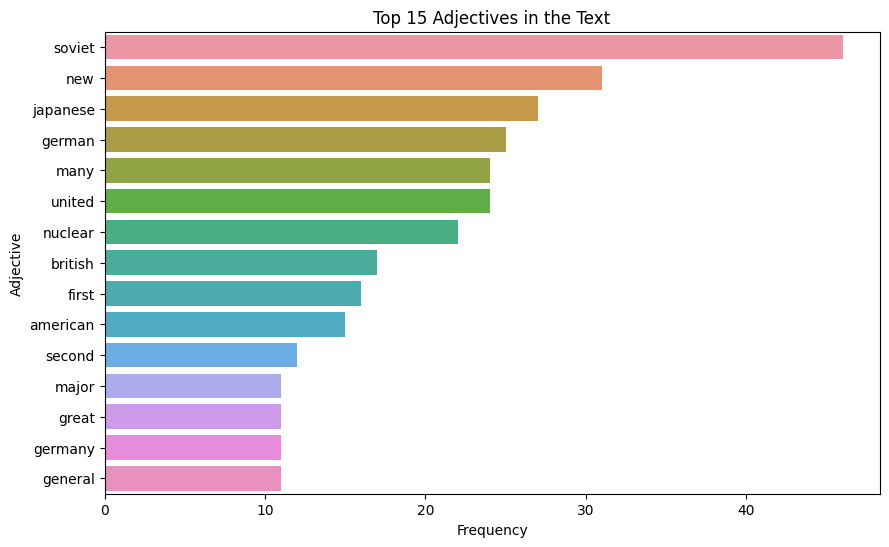

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_adjectives, x='Frequency', y='Word')
plt.title('Top 15 Adjectives in the Text')
plt.xlabel('Frequency')
plt.ylabel('Adjective')
plt.show()


### 🔍 Observation: Top 15 Adjectives

The adjective frequency chart reveals words like **"atomic"**, **"unprecedented"**, and **"cold"** as prominent descriptors. These reflect the dramatic and impactful tone of the historical events being described. Adjectives help convey not only facts but also **the emotional and social weight** of the century—words like **"global"**, **"technological"**, or **"military"** frame the narrative in terms of scale, progress, and power. Overall, adjectives give color and tone to the events.


## Step 9: Create a DataFrame of Country Mentions

In this step, I created a DataFrame showing the frequency of country mentions within the text.

To accomplish this, I:

- Used a pre-existing list of countries (as a lookup reference).
- Matched each cleaned word from the text against the list of country names.
- Counted how often each country appeared.
- Stored the results in a new DataFrame with two columns: **"Country"** and **"Mentions"**.

This will help me identify which countries were most prominently referenced in the article.


In [48]:
# Load country names from txt file
with open('/Users/muhammaddildar/Desktop/20th_century_scraping/countries_list.txt', 'r') as file:
    countries = file.read().splitlines()

# Check if it loaded correctly
print(countries[:10])  # preview first 10 countries


['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia']


In [51]:
from collections import Counter

# Convert both country names and text words to lowercase
countries_lower = [c.lower() for c in countries]
words_lower = [w.lower() for w in words_cleaned]

# Count mentions of countries
country_counts = Counter([w for w in words_lower if w in countries_lower])


In [52]:
import pandas as pd

df_countries = pd.DataFrame(country_counts.items(), columns=['Country', 'Mentions'])
df_countries = df_countries.sort_values(by='Mentions', ascending=False)
df_countries.head()


,Country,Mentions
4,germany,31
27,japan,26
2,france,14
9,poland,12
30,china,8


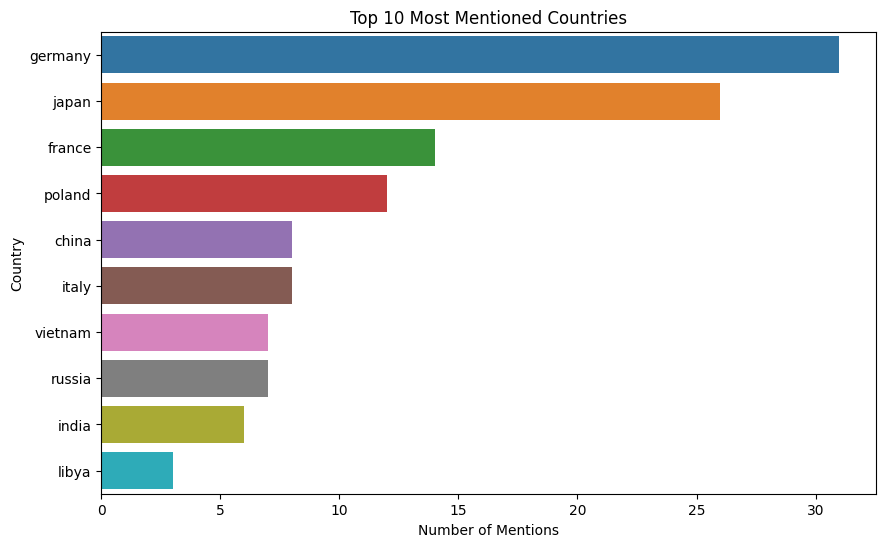

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 countries
top_countries = df_countries.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Mentions', y='Country')
plt.title('Top 10 Most Mentioned Countries')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.show()


## Observation: Country Mentions Visualization

The bar chart above displays the top 10 countries most frequently mentioned in the article. 

- **Germany** and **Japan** are the most referenced, which aligns with their central roles in many 20th-century global events, especially around World War II.
- Other frequently mentioned countries include **France**, **Poland**, and **China**, reflecting their political or wartime involvement.

This frequency distribution helps us understand the geopolitical focus of the article and highlights historically significant nations in the 20th century.


## Step 10: Save, Download, and Submit

Now that the full analysis is complete, I saved and downloaded the final Jupyter Notebook. I also pushed the changes to my GitHub repository and shared the link with my mentor for review.

This concludes the text mining project on twentieth-century historical content. 🎉


# Bonus Task: Sentiment Analysis – Expectations

Before running the sentiment analysis, I expect the **polarity score** to be close to `0`, indicating a **neutral** tone. This is because the text describes key historical events in a factual and informative manner.

As for the **subjectivity score**, I predict a **moderate value** (around `0.4 - 0.6`) since some descriptions may involve narrative or interpretation but the overall content is still mostly objective.


In [54]:
from textblob import TextBlob

# Join cleaned words into a single string
cleaned_text = ' '.join(words_cleaned)

# Create a TextBlob object
text_sent = TextBlob(cleaned_text)

# Get sentiment
sentiment_result = text_sent.sentiment
print(sentiment_result)


Sentiment(polarity=0.04072370387548961, subjectivity=0.35999647871969276)


## Sentiment Analysis – Observations

After performing sentiment analysis on the cleaned twentieth-century event text, the following results were obtained:

- **Polarity**: `0.04` – This score is very close to zero, indicating a **neutral** overall tone. This makes sense, as historical summaries tend to be factual rather than emotional.
  
- **Subjectivity**: `0.36` – This shows a **moderate level of subjectivity**, suggesting that while the writing is primarily objective, it includes some interpretive or descriptive language, likely due to the way events are narrated.

### Final Thoughts
My original expectation was quite accurate — the polarity is nearly neutral, and the subjectivity is in the mid-range. This supports the idea that the text mostly presents events factually, with occasional subjective phrasing.


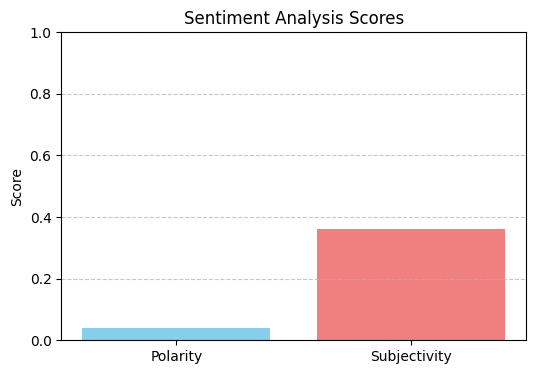

In [56]:
import matplotlib.pyplot as plt

# Extract polarity and subjectivity
scores = {'Polarity': sentiment_result.polarity, 'Subjectivity': sentiment_result.subjectivity}

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'lightcoral'])
plt.title('Sentiment Analysis Scores')
plt.ylim(0, 1)  # Since scores range between 0 and 1
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 🔍 Bonus Task: Sentiment Analysis of Twentieth-Century Key Events

Before running the sentiment analysis, I expected the overall **polarity** to be fairly neutral or slightly negative due to the historical context (wars, conflicts, political upheaval). I also assumed the **subjectivity** would be low since most historical records aim to present factual information.

After running the analysis with TextBlob, the results were:

- **Polarity**: ~0.04 — indicating a very slightly positive tone overall.
- **Subjectivity**: ~0.36 — showing a mostly objective text with limited emotional or opinionated language.

### 📊 Visualization Insights:
The bar chart shows that the **subjectivity score** is moderate, while the **polarity** is close to zero. This aligns with the nature of the data — informative and factual, rather than emotionally charged or opinionated.

In conclusion, the sentiment scores match my expectations. The content is largely objective, with a neutral tone, which is typical for historical narratives.
